In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import skew



In [2]:
df = pd.read_csv("insurance_data.csv")
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [3]:
#drop any row where claim is missing
# Drop any rows where 'claim' is missing
df = df.dropna(subset=["claim"])
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


## We define a 90th percentile threshold to create a dummy binary label

In [15]:
threshold95 = df['claim'].quantile(0.901)
print(f"95th percentile claim value: {threshold95:.2f}")


95th percentile claim value: 34940.06


# LOGISTIC REGRESSION

In [6]:
#create a binary label
df['extreme'] = (df['claim'] >= threshold95).astype(int)
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,extreme
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,0
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,0
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,0
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40,0
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,1
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,1
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,1
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,1


extreme = 1 (for top %10 claims),
extreme = 0 (for non extreme claims)

###### Option 1: uisng only claim as a feature for Logistic regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#reshape claim column to 2D array
X = df[["claim"]]
y = df["extreme"]


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)
# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# compute predicted probabilities
df["extreme_prob"] = model.predict_proba(X)[:, 1]


In [8]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,extreme,extreme_prob
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,0,0.0
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,0,0.0
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,0,0.0
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40,0,0.0
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,1,1.0
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,1,1.0
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,1,1.0
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,1,1.0


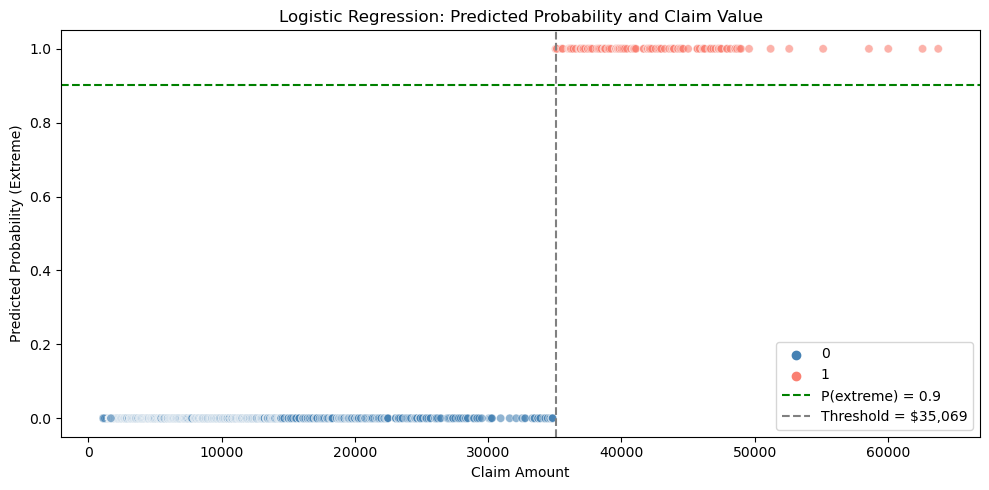

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))  # or (12, 5) if you want it wider
sns.scatterplot(
    data=df,
    x="claim", 
    y="extreme_prob", 
    hue="extreme", 
    palette={0: "steelblue", 1: "salmon"},
    alpha=0.6
)

plt.axhline(y=0.901, color='green', linestyle='--', label="P(extreme) = 0.9")
plt.axvline(x=35069, color='gray', linestyle='--', label='Threshold = $35,069')
plt.xlabel("Claim Amount")
plt.ylabel("Predicted Probability (Extreme)")
plt.title("Logistic Regression: Predicted Probability and Claim Value")
plt.legend()
plt.tight_layout()
plt.savefig("ml_threshold_plot.png", dpi=300)
plt.show()


### selecting threshold 

In [13]:

score_cutoff = df["extreme_prob"].quantile(0.901)
ml_thresh_q90 = df[df["extreme_prob"] > score_cutoff]["claim"].min()
print(f"Threshold from top 90% ML scores: {ml_thresh_q90:.2f}")


Threshold from top 90% ML scores: 35069.37


The plot shows a downward and slughly linear trend between approximately $20,000 and  $45,000.

In [17]:
from scipy.stats import genpareto
threshold = 35069
exceedances = df[df["claim"] > threshold]["claim"] - threshold
params = genpareto.fit(exceedances)
shape, loc, scale = params

print(f"Estimated shape (ξ): {shape:.4f}")
print(f"Estimated scale (σ): {scale:.2f}")


Estimated shape (ξ): -0.2509
Estimated scale (σ): 9124.73


In [19]:
from scipy.stats import genpareto

# Thresholds

threshold_ml = 35069


# Exceedances
excess_ml = df[df["claim"] > threshold_ml]["claim"] - threshold_ml

# Fit GPD to both
params_ml = genpareto.fit(excess_ml)

# Unpack parameters: shape, loc, scale
#xi_mrl, loc_mrl, sigma_mrl = params_mrl
xi_ml, loc_ml, sigma_ml = params_ml



print(f"\n🔹 ML Threshold = ${threshold_ml}")
print(f"  Shape ξ = {xi_ml:.4f}, Scale σ = {sigma_ml:.2f}")



🔹 ML Threshold = $35069
  Shape ξ = -0.2509, Scale σ = 9124.73


✅ Plot saved as: ML_Threshold_35069_QQ_PP_Plots.png


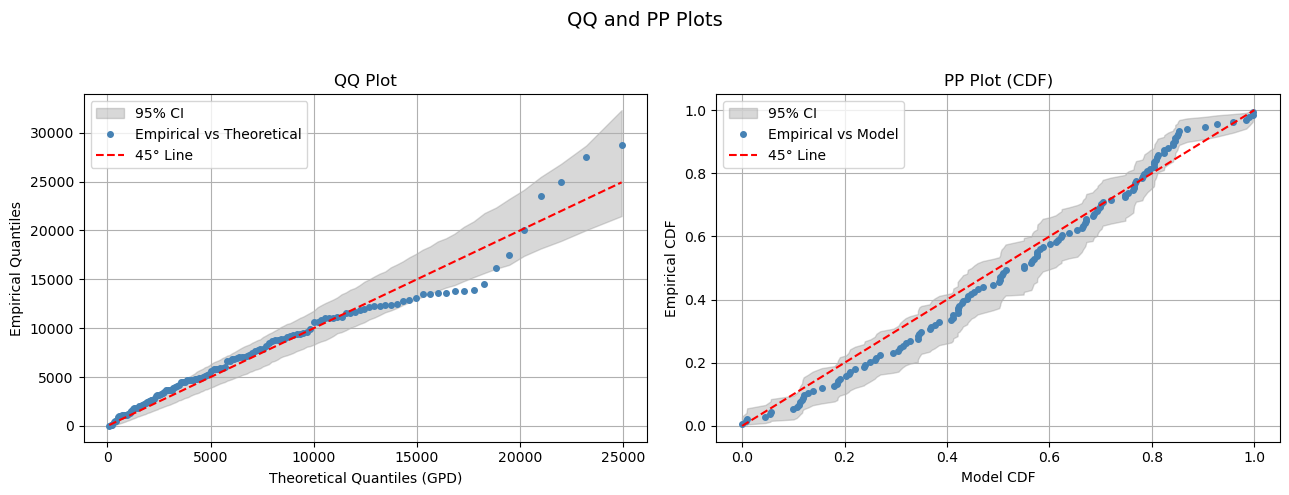

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto
import re

def evt_diagnostic_plots_with_ci(excess_data, threshold, xi, loc, sigma, title):
    sorted_excess = np.sort(excess_data)
    n = len(sorted_excess)
    probs = np.linspace(0.01, 0.99, n)

    # --- QQ Plot prep ---
    q_theoretical = genpareto.ppf(probs, c=xi, loc=loc, scale=sigma)

    # Bootstrap for QQ CI
    num_bootstrap = 1000
    qq_boot = np.array([
        np.sort(genpareto.rvs(c=xi, loc=loc, scale=sigma, size=n))
        for _ in range(num_bootstrap)
    ])
    qq_lower = np.percentile(qq_boot, 2.5, axis=0)
    qq_upper = np.percentile(qq_boot, 97.5, axis=0)

    # --- PP Plot prep ---
    ecdf = np.arange(1, n + 1) / (n + 1)
    model_cdf = genpareto.cdf(sorted_excess, c=xi, loc=loc, scale=sigma)

    # Bootstrap for PP CI
    pp_boot = np.array([
        np.sort(genpareto.cdf(np.sort(genpareto.rvs(c=xi, loc=loc, scale=sigma, size=n)), c=xi, loc=loc, scale=sigma))
        for _ in range(num_bootstrap)
    ])
    pp_lower = np.percentile(pp_boot, 2.5, axis=0)
    pp_upper = np.percentile(pp_boot, 97.5, axis=0)

    # --- Plot ---
    fig, axs = plt.subplots(1, 2, figsize=(13, 5))

    # QQ Plot
    axs[0].fill_between(q_theoretical, qq_lower, qq_upper, color='gray', alpha=0.3, label="95% CI")
    axs[0].plot(q_theoretical, sorted_excess, 'o', color='steelblue', markersize=4, label="Empirical vs Theoretical")
    axs[0].plot(q_theoretical, q_theoretical, 'r--', label="45° Line")
    axs[0].set_title("QQ Plot")
    axs[0].set_xlabel("Theoretical Quantiles (GPD)")
    axs[0].set_ylabel("Empirical Quantiles")
    axs[0].legend()
    axs[0].grid(True)

    # PP Plot
    axs[1].fill_between(model_cdf, pp_lower, pp_upper, color='gray', alpha=0.3, label="95% CI")
    axs[1].plot(model_cdf, ecdf, 'o', color='steelblue', markersize=4, label="Empirical vs Model")
    axs[1].plot([0, 1], [0, 1], 'r--', label="45° Line")
    axs[1].set_title("PP Plot (CDF)")
    axs[1].set_xlabel("Model CDF")
    axs[1].set_ylabel("Empirical CDF")
    axs[1].legend()
    axs[1].grid(True)

    # Final Touch – updated title here
    plt.suptitle("QQ and PP Plots", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Save
    safe_title = re.sub(r'[^\w\s-]', '', title).strip().replace(' ', '_')
    filename = f"{safe_title}_QQ_PP_Plots.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"✅ Plot saved as: {filename}")
    plt.show()

# Example usage:
evt_diagnostic_plots_with_ci(
    excess_data=excess_ml,
    threshold=35069,
    xi=xi_ml,
    loc=loc_ml,
    sigma=sigma_ml,
    title="ML Threshold ($35,069)"
)


# VAR and Expected Shortfall

In [21]:
n = len(df)  # total number of claims
Nu = len(excess_ml)  # number of exceedances
alpha = 0.99

scaled = (n / Nu) * (1 - alpha)

VaR = threshold + (sigma_ml / xi_ml) * (scaled ** (-xi_ml) - 1)

if xi_ml < 1:
    ES = (VaR / (1 - xi_ml)) + (sigma_ml - xi_ml * threshold) / (1 - xi_ml)
else:
    ES = np.inf  # ES is undefined when xi >= 1


In [22]:
import numpy as np
from scipy.stats import genpareto

def calculate_var_cvar_unconditional(threshold, xi, sigma, alpha, n_total, n_exceedances):

    # Apply scaling for full-sample VaR
    scaled = (n_total / n_exceedances) * (1 - alpha)

    # Compute VaR (quantile) using scaled formula
    if xi != 0:
        var = threshold + (sigma / xi) * (scaled ** (-xi) - 1)
    else:
        var = threshold - sigma * np.log(scaled)

    # Compute Conditional Value at Risk (ES) only if xi < 1
    if xi < 1:
        cvar = (var + (sigma - xi * threshold) / (1 - xi))
    else:
        cvar = np.inf  # mean does not exist when xi >= 1

    return var, cvar

# === Example Usage ===
alpha = 0.99  # 99% confidence level
threshold = 35609  # ML-based threshold
xi = xi_ml 
sigma = sigma_ml  

n_total = len(df)  # Total number of observations
n_exceedances = len(df[df["claim"] > threshold])  # Number of exceedances

# Compute
var_99, cvar_99 = calculate_var_cvar_unconditional(threshold, xi, sigma, alpha, n_total, n_exceedances)

# Display result
print(f"Unconditional VaR at {alpha*100:.0f}% level: ${var_99:,.2f}")
print(f"Unconditional CVaR at {alpha*100:.0f}% level: ${cvar_99:,.2f}")


Unconditional VaR at 99% level: $51,291.44
Unconditional CVaR at 99% level: $65,728.35
